In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Question2

In [2]:
dataset=pd.read_csv("dataset_q2_q4.csv")
dataset

,x1,x2,x3,y_label
0,-100.838182,100.000000,0.000000,-6.908485e+06
1,-98.826004,101.202405,0.901804,-7.167624e+06
2,-98.627987,102.404810,1.803607,-7.429470e+06
3,-96.960173,103.607214,2.705411,-7.699765e+06
4,-97.190325,104.809619,3.607214,-7.972486e+06
...,...,...,...,...
495,294.786321,695.190381,446.392786,1.206979e+09
496,296.056099,696.392786,447.294589,1.216369e+09
497,297.526847,697.595190,448.196393,1.225805e+09
498,300.037521,698.797595,449.098196,1.235292e+09


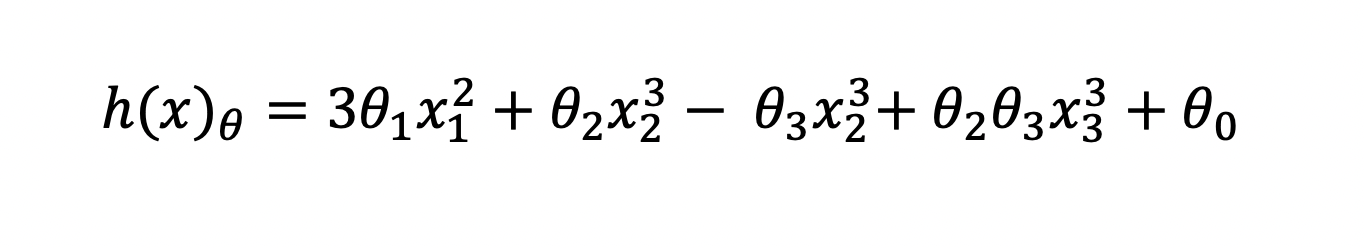

In [3]:
y=dataset['y_label']
X=dataset.drop('y_label', axis=1)

In [4]:
X=np.array(X)
y=np.array(y)

In [5]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.4)

print(x_train.shape)
print(x_test.shape)

(300, 3)
(200, 3)


thetas:  206816077.7696268 958366.6355066845 1134529.3752806142 1134529.375280615
loss = 6.199671658318998e+16


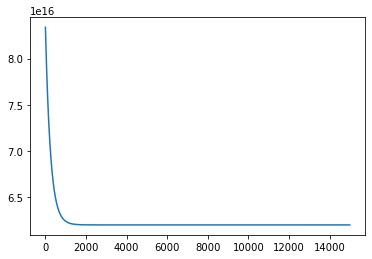

In [7]:
def fit_m(X,Y,lr=0.002,epochs=15000):
    
    
    theta0=0
    theta=np.zeros(X.shape[1])
    theta1=2
    theta2=1
    theta3=1
    
    losses=[]
    for i in range(epochs):
        y_hat=(X[:,0]**2).dot(3*theta[0])+(X[:,1]**3).dot(theta[1])-(X[:,1]**3).dot(theta[2])+(X[:,2]**3).dot(theta[1]*theta[2])+theta0

        

        loss=np.sum((y_train-y_hat)**2)/(Y.size*2)
        losses.append(loss)
        grad_theta0=np.sum(y_hat-y_train)/(Y.size)
        grad_theta1=np.matmul((3*X[:,0]**2),(y_hat-y_train))/Y.size
        
        
        grad_theta2=np.matmul((X[:,2]**3)+(theta[2]*(X[:,2]**3)),(y_hat-y_train))/Y.size
        grad_theta3=np.matmul((X[:,1]**3)+(theta[1]*(X[:,2]**3)),(y_hat-y_train))/Y.size

        
        
        
        theta0 -= lr*grad_theta0
        theta1 =theta[0]- lr*grad_theta1
        theta2 =theta[1]- lr*grad_theta2
        theta3 =theta[2]- lr*grad_theta3

    plt.plot(list(range(epochs)),losses) 
    
    print('thetas: ',theta0,theta1,theta2,theta3)
    
    print('loss =',loss)
fit_m(x_train,y_train) 

In [8]:
def fit_m1(X,Y,lr=0.01,epochs=3000):
    theta0=0
    theta=np.zeros(X.shape[1])
    theta1=theta[0]
    theta2=theta[1]
    theta3=theta[2]
    losses=[]
    for i in range(epochs):
        loss=0
        th0_grad=0
        th1_grad=0
        th2_grad=0
        th3_grad=0

        for x,y in zip(X,Y):
        
            y_hat=(X[:,0]**2).dot(3*theta[0])+(X[:,1]**3).dot(theta[1])-(X[:,1]**3).dot(theta[2])+(X[:,2]**3).dot(theta[1]*theta[2])+theta0
            loss+=(y_hat-y)**2
            th0_grad=th0_grad+(y_hat-y)*1
            th1_grad=th1_grad+(y_hat-y)*(3*X[:,0]**2)
            th2_grad=th2_grad+(y_hat-y)*(X[:,1]**3)+(X[:,2]**3).dot(theta[2])
            th3_grad=th3_grad+(y_hat-y)*(-X[:,1]**3)+(X[:,2]**3).dot(theta[1])
            
            
        losses.append(loss/Y.size)  
        th0_grad=th0_grad/Y.size
        th1_grad=th1_grad/Y.size
        th2_grad=th2_grad/Y.size
        th3_grad=th3_grad/Y.size
        
        loss=loss/(2*Y.size)

    theta0-=lr*th0_grad
    theta1-=lr*th1_grad
    theta2-=lr*th2_grad
    theta3-=lr*th3_grad
        
    plt.plot(list(range(epochs)),losses)
    return (theta0,theta1,theta2,theta3)

(array([2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        2068160.77769646, 2068160.77769646, 2068160.77769646,
        

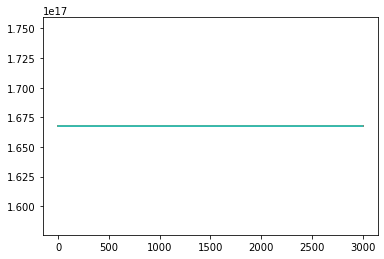

In [9]:
fit_m1(x_train,y_train)    

In [10]:
## generate regression dataset
X, y = make_regression(n_samples=500, n_features=15,random_state=10)
n_samples,n_features=X.shape

In [12]:
##split dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3)

print(x_train.shape)
print(x_test.shape)

(350, 15)
(150, 15)


## Question3

In [13]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from tabulate import tabulate

In [14]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
lr=mean_squared_error(y_test,y_pred)
lr

3.05893963681201e-26

In [15]:
poly_f = PolynomialFeatures(degree=2)
l_r = LinearRegression()

X_poly = poly_f.fit_transform(x_test)
l_r = l_r.fit(X_poly, y_test)
Y_pred_p = l_r.predict(X_poly)
p=mean_squared_error(y_test,Y_pred_p)
p

1.3372410344733812e-25

In [16]:
lasso = Lasso()
lasso.fit(x_train,y_train)
Y_pred_ = lasso.predict(x_test)
ls=mean_squared_error(y_test,Y_pred_)
ls

11.108261128870184

In [17]:
rid = Ridge()
rid.fit(x_train,y_train)
Y_pred__ = rid.predict(x_test)
rd=mean_squared_error(y_test,Y_pred__)
rd

0.26423561641538224

In [19]:
table = [["linear regression",lr],["polynominal",p],["lasso",ls], ["ridge",rd]]
print(tabulate(table))

-----------------  ------------
linear regression   3.05894e-26
polynominal         1.33724e-25
lasso              11.1083
ridge               0.264236
-----------------  ------------


## question4

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data_set= pd.read_csv("dataset_q2_q4.csv")
data_set

,x1,x2,x3,y_label
0,-100.838182,100.000000,0.000000,-6.908485e+06
1,-98.826004,101.202405,0.901804,-7.167624e+06
2,-98.627987,102.404810,1.803607,-7.429470e+06
3,-96.960173,103.607214,2.705411,-7.699765e+06
4,-97.190325,104.809619,3.607214,-7.972486e+06
...,...,...,...,...
495,294.786321,695.190381,446.392786,1.206979e+09
496,296.056099,696.392786,447.294589,1.216369e+09
497,297.526847,697.595190,448.196393,1.225805e+09
498,300.037521,698.797595,449.098196,1.235292e+09


In [22]:
x = data_set[["x1","x2","x3"]].values
y = data_set["y_label"].values
n = len(y)

In [23]:
r = np.append(np.ones([n,1]),x,axis=1) 

In [24]:
theta= np.linalg.inv((r.T.dot(r))).dot(r.T.dot(y))

In [25]:
print(theta)

[-1.72805325e+09 -1.48319716e+07 -3.93216000e+06  2.17579520e+07]
